<center>Student Name: Gael Gatera</center>

The code below was made to hide specific input cells and was found on stack overflow (5).

In [ ]:
#from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide Code"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

#display(HTML(toggle_code_prepare_str + toggle_code_str))

#def Hide_code():
#    display(HTML(toggle_code_str))

# Introduction

## Essential Libraries, Tools & Dependencies

Relative importing allows a python file or a Pyhon module to access the script from another Python file or module. The import statement adds the object to the current scope of your program (11).

__Scikit-learn (sklearn):__ Contains a number of state-of-the-art machine learning algorithms that were used throughout this project. Scikit-learn is considered the most prominent Python library for machine learning and depends on two other Python packages, Numpy and SciPy (5).

__OS:__ The OS module in Python provides a way of using operating system dependent functionality. The functions that the OS module provides allows you to interface with the underlying operating system that Python is running on - be that Windows, Mac or Linux (3).

__Pandas:__ This is a Python library for data wrangling and analysis. Pandas provides a great range of methods to modify and operate on this table; in particular, it allows SQL-like queries and joins of tables (5). This library is mainly used in data pre-processing.

__Numpy:__ This is one of the fundamental packages for scientific computing in Python. It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations. In scikit-learn, the Numpy array is the fundamental data structure (5).

__Scipy:__ This is a collection of functions for scientic computing in Python. It provides, among other functionalities, advanced linear algebra routines, mathematical functions, and statistical distributions (5).

__Matplotlib:__ This is considered the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots and so on (5).

__Seaborn:__ This is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. Seaborn aims to make visualization a central part of exploring and understanding data. It's dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantinc mapping and statistical aggregation to produce informative plots (6). Seaborn's functionality include but is not limited to:

  * A dataset-oriented API for examining relationships between multiple variables.

  * Specialized support for using categorical variables to show observations or aggregate statistics.
  
  * Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data.
  
__Itertools:__ Collection of tools for handling iterators. Simply put, iterators are data types that can be used in a for loop. The most common iterator in Python is the list(9).
  
__io module:__ The default interface to access files and streams in Python 3.0 (docs.python.org).

In [1]:
#display(HTML(toggle_code_str))

#Importing Dependencies 
import os

import sys
print("Python version: {}".format(sys.version))

# Importing panas 
import pandas as pd
print("Pandas version: {}".format(pd.__version__))

# Importing numpy 
import numpy as np
print("Numpy version: {}".format(np.__version__))

# Importing matplotlib for plotting 
import matplotlib as plt
print("MatplotLib version: {}".format(plt.__version__))

# importing seaborn for plotting 
import seaborn as sns
sns.set_style('whitegrid')
sns.set()
print("Seaborn version: {}".format(sns.__version__))

# Importing warnings to ignore 'errors'
import warnings
warnings.filterwarnings('ignore')
plt.style.use('classic')

# Importing scipy & libraries that we will use  
import scipy as sp
print("Numpy version: {}".format(sp.__version__))
from scipy.stats import skew

# Stats for statistical functions 
from scipy import stats 

#Importing scipy for stats for pearson distribution Skewness and Kurtosis
from scipy.stats.stats import pearsonr

#Importing scipy for stats for normal distribution 
from scipy.stats import norm

# Importing Ipython 
import IPython
print("IPython version: {}".format(IPython.__version__))

# Importing sckitit learn & the decision tree module
import sklearn
print("sklearn version: {}".format(sklearn.__version__))
from sklearn import tree

# Import label encoder
from sklearn.preprocessing import LabelEncoder

Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Pandas version: 0.23.4
Numpy version: 1.15.4
MatplotLib version: 3.0.2
Seaborn version: 0.9.0
Numpy version: 1.1.0
IPython version: 7.2.0
sklearn version: 0.20.1


## Data Pre-Processing
  The pandas library is very helpful with this step of the Data exploration and overall Data Analysis workflow. Pandas allows the user to import the raw csv file and transform it into a Dataframe with which many operations can be done on. The first operation that was done in this case is to use the ".columns" method in order to look at the columns which are relevant to the project. 

In [2]:
#display(HTML(toggle_code_str))
USATrendingVideos = pd.read_csv("Data/USvideos.csv")
USATrendingVideos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Dropping Unecessary Columns
The data contains columns such as 'comments_disabled' and 'ratings_disabled' which are set by the actual Youtuber and should not affect whether a video trends or not. This simply means that the Youtuber does not want comments and ratings on their videos. Using columns such as 'description' and 'tags' would be useful for sentiment analysis models, however will not be performed in this project and therefore will be dropped from the dataframe. The columns 'thumbnail_link' and 'video_error_or_removed' are also irrelevent to the project and will also be dropped for faster computation and ease of analysis. 

In [3]:
#display(HTML(toggle_code_str))
USATrendingVideos = USATrendingVideos.drop(['comments_disabled','ratings_disabled',
                      'description','tags', 'thumbnail_link', 'video_error_or_removed'], axis= 1)

### First Look

The pandas ".head()" method allows the user to look at the first 5 rows and the column labels. This is very helpful in order to see what kind of Data is being worked with. Also, checking how many values are contained in each column and seeing if there are any missing values can be useful.

In [4]:
#display(HTML(toggle_code_str))
#First look at the kind of Data we have
USATrendingVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,8O-ZUXGcuWU,18.14.06,Nintendo @ E3 2018: Day 2,Nintendo,20,2018-06-14T01:31:53.000,1549110,21905,1516,1318
1,Gi56dSh8Fq8,18.14.06,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,2018-06-13T18:00:32.000,402418,10070,3303,2142
2,-9rdDeWzvsU,18.14.06,Stampede - Alexander Jean Ft. Lindsey Stirling,Lindsey Stirling,10,2018-06-13T16:00:24.000,296615,38671,463,2348
3,MrMAfMbZOmg,18.14.06,Troye Sivan - Dance To This (Official Audio) f...,TroyeSivanVEVO,10,2018-06-13T16:00:01.000,1473589,214511,2011,17455
4,JGm9Y_hFqNk,18.14.06,First Take reacts: Kyrie Irving says contract ...,ESPN,17,2018-06-13T15:06:08.000,812832,7701,320,2505


In [5]:
#display(HTML(toggle_code_str))
print("Shape of data: {}".format(USATrendingVideos.shape))

Shape of data: (40949, 10)


The good news is that all columns have the same amount of values and there are no missing values. When looking at the "publishing_time" column, we can see that something is not correct. The data contained in the "publish_time" column in reality is a combination of date and time with the character "T" acting as a delimiter. The aformentioned can be kept in mind as a next step for the data preparation to separate the two before turning them into parameters. Furthermore, when we are looking at the "category_id" column, we see that it only contains integers. Altough this is not a bad thing in concept, a proactive analyst can realize that these will eventually be turned into categorical variables and having them labeled would be ideal. Luckily, the zipfile that was downloaded from Kaggle contains a .json file which has each categorical_id number with it's corresponding label.

In [6]:
USATrendingVideos[['publish_date','publish_time']] = USATrendingVideos['publish_time'].str.split('T', expand=True)

When looking at the two columns that involve a dates, 'publish_date' & 'trending_date' one can come to the conclusion that different videos take different amount of time to trend after they are published. So for the purpose of this project, a new column will be created that will calculate the amount of time different videos took to trend.

In [7]:
# Transforming Trending date column to datetime format
USATrendingVideos['trending_date'] = pd.to_datetime(USATrendingVideos['trending_date'], format='%y.%d.%m').dt.date

In [8]:
USATrendingVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date
0,8O-ZUXGcuWU,2018-06-14,Nintendo @ E3 2018: Day 2,Nintendo,20,01:31:53.000,1549110,21905,1516,1318,2018-06-14
1,Gi56dSh8Fq8,2018-06-14,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,18:00:32.000,402418,10070,3303,2142,2018-06-13
2,-9rdDeWzvsU,2018-06-14,Stampede - Alexander Jean Ft. Lindsey Stirling,Lindsey Stirling,10,16:00:24.000,296615,38671,463,2348,2018-06-13
3,MrMAfMbZOmg,2018-06-14,Troye Sivan - Dance To This (Official Audio) f...,TroyeSivanVEVO,10,16:00:01.000,1473589,214511,2011,17455,2018-06-13
4,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,ESPN,17,15:06:08.000,812832,7701,320,2505,2018-06-13


In [9]:
#Transforming Publish date column to datetime format
USATrendingVideos['publish_date'] = pd.to_datetime(USATrendingVideos['publish_date'], format='%Y-%M-%d').dt.date

In [10]:
# Create New Variable Counting Days to Achieving Trending Status
USATrendingVideos['days_to_trending'] = (USATrendingVideos.trending_date - USATrendingVideos.publish_date).dt.days

In [11]:
# Here we see that our new column was added to the dataframe
USATrendingVideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,days_to_trending
0,8O-ZUXGcuWU,2018-06-14,Nintendo @ E3 2018: Day 2,Nintendo,20,01:31:53.000,1549110,21905,1516,1318,2018-01-14,151
1,Gi56dSh8Fq8,2018-06-14,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,18:00:32.000,402418,10070,3303,2142,2018-01-13,152
2,-9rdDeWzvsU,2018-06-14,Stampede - Alexander Jean Ft. Lindsey Stirling,Lindsey Stirling,10,16:00:24.000,296615,38671,463,2348,2018-01-13,152
3,MrMAfMbZOmg,2018-06-14,Troye Sivan - Dance To This (Official Audio) f...,TroyeSivanVEVO,10,16:00:01.000,1473589,214511,2011,17455,2018-01-13,152
4,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,ESPN,17,15:06:08.000,812832,7701,320,2505,2018-01-13,152


### Categorizing days to trending as percentiles

In [12]:
USATrendingVideos.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

count    40949.000000
mean       146.478082
std        190.379085
min          0.000000
5%           3.000000
25%         38.000000
50%         99.000000
75%        305.000000
95%        340.000000
max       4396.000000
Name: days_to_trending, dtype: float64

### Converting category_id.json file to .csv file

It is very common that when pulling data from an API that the data comes in the form on a .json file. These files are key value pairs just like dictionaries, meaning they can also be made into dataframes. This section converts the US_category_id.json file which contains all the previously mentioned category id's whith the appropriate labels.

In [13]:
#display(HTML(toggle_code_str))
# Dependencies
import json
import csv
# Read "category_id" file into a variable and parse it into a JSON object:
#read file
with open('Data/US_category_id.json', 'r') as jsonfile:
    data=jsonfile.read()
 
# parse file
jsonobj = json.loads(data)

In [15]:

'''
Since .json files are like dictionaries as in they are key value pairs. 
We can check if the code we use to convert works fine.
'''
print(jsonobj['items'][3]['id'])

15


The previous code successfully outputed '15', one of the integers in the 'category_id'. This means we now have our JSON object in memory.  Next step, we need to write our code to convert the JSON into CSV by creating a list of keys in the JSON. Once the .json file was converted into .csv file we can do the same ".head" method that was done on the initial dataframe in order to look at the column labels.

In [ ]:
#display(HTML(toggle_code_str))
keylist = []
for key in jsonobj['items']:
    keylist.append(key)

In [ ]:
#display(HTML(toggle_code_str))
'''

f = csv.writer(open("test.csv", "w"))
f.writerow(keylist)

#Iterate through each record in the JSON Array
for record in jsonobj:
Create placeholder to hold the data for the current record
    currentrecord = []
#Iterate through each key in the keylist and add the data to our current record list
for key in keylist:
    currentrecord.append(record[key])

    #Write the current record as a line in our CSV
f.writerow(currentrecord)

'''

In [16]:
#display(HTML(toggle_code_str))
CategoryCSV = pd.read_csv("Data/convertcsv.csv")
CategoryCSV.head()

,kind,etag,id,snippet/channelId,snippet/title,snippet/assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


The results above shows the labels for each category id as 'snippet/title'. The next step will be to rename the 'id' column to 'category_id' so it can be merged to the USATrendingVideos dataframe. All the other columns can be dropped as they are not required for the purposes of this project. Another step for the data exploration is to do a '.shape()' and look at how many columns the and rows the dataset has.

In [17]:
#display(HTML(toggle_code_str))
CategoryCSV = CategoryCSV.rename(columns={'id': 'category_id'})
CategoryCSV = CategoryCSV.rename(columns={'snippet/title': 'category_name'})
print("Shape of data: {}".format(CategoryCSV.shape))

Shape of data: (32, 6)


In [18]:
USATrendingVideos_v2 = pd.merge(USATrendingVideos,CategoryCSV,how="left",on="category_id")

In [19]:
USATrendingVideos_v2 = USATrendingVideos_v2.drop(['kind','etag',
                      'snippet/channelId', 'snippet/assignable'], axis= 1)

In [20]:
USATrendingVideos_v2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,days_to_trending,category_name
0,8O-ZUXGcuWU,2018-06-14,Nintendo @ E3 2018: Day 2,Nintendo,20,01:31:53.000,1549110,21905,1516,1318,2018-01-14,151,Gaming
1,Gi56dSh8Fq8,2018-06-14,Gourmet Chef Makes A Big Mac Super Fancy,BuzzFeedVideo,22,18:00:32.000,402418,10070,3303,2142,2018-01-13,152,People & Blogs
2,-9rdDeWzvsU,2018-06-14,Stampede - Alexander Jean Ft. Lindsey Stirling,Lindsey Stirling,10,16:00:24.000,296615,38671,463,2348,2018-01-13,152,Music
3,MrMAfMbZOmg,2018-06-14,Troye Sivan - Dance To This (Official Audio) f...,TroyeSivanVEVO,10,16:00:01.000,1473589,214511,2011,17455,2018-01-13,152,Music
4,JGm9Y_hFqNk,2018-06-14,First Take reacts: Kyrie Irving says contract ...,ESPN,17,15:06:08.000,812832,7701,320,2505,2018-01-13,152,Sports


In [21]:
print("Shape of data: {}".format(USATrendingVideos_v2.shape))

Shape of data: (40949, 13)


## Index for Trending Dates
The code below creates an index that essentially groups all videos that trended on the same day and use that as an index for our analysis.

In [22]:
USATrendingVideos_v2.set_index(['trending_date','video_id'],inplace=True)
USATrendingVideos_v2.head()

title  \
trending_date video_id                                                         
2018-06-14    8O-ZUXGcuWU                          Nintendo @ E3 2018: Day 2   
              Gi56dSh8Fq8           Gourmet Chef Makes A Big Mac Super Fancy   
              -9rdDeWzvsU     Stampede - Alexander Jean Ft. Lindsey Stirling   
              MrMAfMbZOmg  Troye Sivan - Dance To This (Official Audio) f...   
              JGm9Y_hFqNk  First Take reacts: Kyrie Irving says contract ...   

                              channel_title  category_id  publish_time  \
trending_date video_id                                                   
2018-06-14    8O-ZUXGcuWU          Nintendo           20  01:31:53.000   
              Gi56dSh8Fq8     BuzzFeedVideo           22  18:00:32.000   
              -9rdDeWzvsU  Lindsey Stirling           10  16:00:24.000   
              MrMAfMbZOmg    TroyeSivanVEVO           10  16:00:01.000   
              JGm9Y_hFqNk              ESPN           17  15:06:08.000   

                             views   likes  dislikes  comment_count  \
trending_date video_id                                                
2018-06-14    8O-ZUXGcuWU  1549110   21905      1516           1318   
              Gi56dSh8Fq8   402418   10070      3303           2142   
              -9rdDeWzvsU   296615   38671       463           2348   
              MrMAfMbZOmg  1473589  214511      2011          17455   
              JGm9Y_hFqNk   812832    7701       320           2505   

                          publish_date  days_to_trending   category_name  
trending_date video_id                                                    
2018-06-14    8O-ZUXGcuWU   2018-01-14               151          Gaming  
              Gi56dSh8Fq8   2018-01-13               152  People & Blogs  
              -9rdDeWzvsU   2018-01-13               152           Music  
              MrMAfMbZOmg   2018-01-13               152           Music  
              JGm9Y_hFqNk   2018-01-13               152          Sports

### Dislike percentages

In [23]:
USATrendingVideos_v2['dislike_percentage'] = USATrendingVideos_v2['dislikes'] / (USATrendingVideos_v2['dislikes'] + USATrendingVideos_v2['likes'])
USATrendingVideos_v2.dislike_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    40779.000000
mean         0.066887
std          0.102317
min          0.000000
5%           0.007177
25%          0.017210
50%          0.033012
75%          0.069669
95%          0.250307
max          1.000000
Name: dislike_percentage, dtype: float64

# Data Analysis

## Grouping By same trending dates
In the section below, we are using the fact that we created a new index level that grouped videos by trending dates. The aformentioned index is considered "level 01, therefore we are createding a dataframe that will group all videos that are in the same level and we will do so based on the video's first occurance.

In [24]:
# Map Category IDs using the supporting file: US_category_id.json
us_videos_categories = pd.read_json('Data/US_category_id.json')
categories = {int(category['id']): category['snippet']['title'] for category in us_videos_categories['items']}

In [25]:
# Video Level Stats Using First Occurence Values
video_groups = USATrendingVideos_v2.groupby(level=1).first()
# creating a frequency of occurance by title 
video_groups['freq'] = USATrendingVideos_v2['title'].groupby(level=1).count()
#cid meaning category id
video_groups['category'] = [categories[cid] for cid in video_groups.category_id]
video_groups.drop('category_id',axis=1,inplace=True)
video_groups.sort_values(by=['views'],ascending=False,inplace=True)
video_groups['views_ratio'] = USATrendingVideos_v2['views'].groupby(level=1).last() / video_groups.views
# dt as in change in time
views_min_dt = pd.Series([t[0] for t in USATrendingVideos_v2['views'].groupby(level=1).idxmin()],index=video_groups.index)
video_groups['views_min_dt'] = views_min_dt
video_groups.head(10)

,title,channel_title,publish_time,views,likes,dislikes,comment_count,publish_date,days_to_trending,category_name,dislike_percentage,freq,category,views_ratio,views_min_dt
video_id,,,,,,,,,,,,,,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,04:00:07.000,217750076,4934188,335462,509799,2018-01-06,145,Music,0.063659,25,Music,1.012585,2017-11-16
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,17:58:51.000,149376127,3093544,1643059,810698,2017-01-06,342,Entertainment,0.346886,8,Entertainment,0.165904,2018-06-06
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,09:00:02.000,121219886,5595203,205565,1225326,2018-01-18,133,Music,0.035438,14,Music,1.014775,2018-02-01
TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,05:00:01.000,102012605,2376636,117196,134224,2017-01-17,313,Music,0.046994,10,Music,0.004901,2018-04-29
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,04:00:03.000,74523616,2562936,96851,211699,2018-01-20,100,Music,0.036413,20,Music,1.056149,2017-11-29
tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,01:15:10.000,71560694,1928392,113990,162990,2018-01-12,74,Music,0.055812,15,Music,0.207107,2017-11-14
DkeiKbqa02g,"Calvin Harris, Dua Lipa - One Kiss (Official V...",CalvinHarrisVEVO,23:01:00.000,71017021,828626,36928,26279,2018-01-02,143,Music,0.042664,21,Music,0.058823,2018-04-27
i0p1bmr0EmE,TWICE What is Love? M/V,jypentertainment,08:59:51.000,69295519,1324609,118647,238744,2018-01-09,108,Music,0.082208,14,Music,0.560982,2017-12-20
M4ZoCHID9GI,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,16:00:04.000,67141103,1139848,27532,47735,2018-01-12,108,Music,0.023584,19,Music,1.046199,2018-02-14


In the dataframe above, we can see that some videos trended quite frequently. For example the video "Childish Gambino - This Is America (Official V.." trended for 25 consecutive days. This might suggest that most likely if a video starts trending it will keep trending.

In [26]:
tmp = video_groups[['freq','days_to_trending']]
days_to_trending_max = USATrendingVideos_v2.groupby(level=1)[['days_to_trending']].max()
tmp = tmp.join(days_to_trending_max,how='left',rsuffix='_max')
tmp['test'] = tmp.days_to_trending_max - tmp.days_to_trending + 1
print('{:.2%}'.format(sum([a==b for a,b in zip(tmp.freq,tmp.test)]) / len(tmp.index)))
tmp[tmp.test != tmp.freq].head()

13.58%


,freq,days_to_trending,days_to_trending_max,test
video_id,,,,
VYOjWnS4cMY,25,145,147,3
FlsCjmMhFmw,8,342,342,1
7C2z4GqqS5E,14,133,134,2
TyHvyGVs42U,10,313,313,1
ffxKSjUwKdU,20,100,114,15


The code above was written in order to test the hypothesis that if a video starts trending then it will most likely keep trending. This was proven to be false as the result for videos trending for more than one consecutive day was only 13.58 %.

In [27]:
# Comparing the amount of videos for the original dataset "USATrendingVideos_v2" 
# and the dataset that only took into account single occurances
print("USATrendingVideos version 2 contains {} videos".format(USATrendingVideos_v2.shape[0]))
print("While the final dataset contains {} videos".format(video_groups.shape[0]))

USATrendingVideos version 2 contains 40949 videos
While the final dataset contains 6282 videos


## Hyperparameters

Continuing, for this project I will take a closer look and gain better insight at the columns and see which properties of the data can be essential to predicting trending before they are prossed. Before any Machine learning is applied onto them. These proporties are called hyperparameters in Machine Learning. A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data (Brownlee). On his Machine Learning blogpost, Jason Brownlee gives the following description to hyperparameters: 
* They are required by the model when making predictions. 
* They values define the skill of the model on your problem.
* They are estimated or learned from data.
* They are often not set manually by the practitioner.
* They are often saved as part of the learned model.

### Hyperparameter Correlation Analysis

One way to choose parameters is by looking at which ones correlate with which before putting them into a machine learning model. Below is a correlation heat map for the data that still contained multiple trending dates for each video.

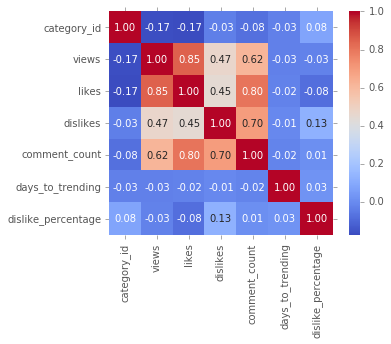

In [28]:
with plt.style.context(('ggplot')):
    sns.heatmap(USATrendingVideos_v2.corr(), 
                cmap='coolwarm',
                cbar=True, annot=True, 
                square=True, fmt='.2f', annot_kws={'size':10})

In [29]:
corr_matrix = USATrendingVideos_v2.corr()
corr_matrix["views"].sort_values(ascending=False) 

views                 1.000000
likes                 0.849177
comment_count         0.617621
dislikes              0.472213
dislike_percentage   -0.026428
days_to_trending     -0.028503
category_id          -0.168231
Name: views, dtype: float64

In [30]:
corr_matrix["likes"].sort_values(ascending=False) 

likes                 1.000000
views                 0.849177
comment_count         0.803057
dislikes              0.447186
days_to_trending     -0.024663
dislike_percentage   -0.080572
category_id          -0.173921
Name: likes, dtype: float64

Below is a correlation heatmap for the data that had only contained the last trending day for each video.

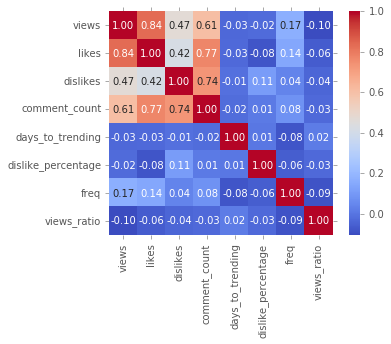

In [31]:
with plt.style.context(('ggplot')):
    sns.heatmap(video_groups.corr(), 
                cmap='coolwarm',
                cbar=True, annot=True, 
                square=True, fmt='.2f', annot_kws={'size':10})

In [32]:
corr_matrix2 = video_groups.corr()
corr_matrix2["views"].sort_values(ascending=False)

views                 1.000000
likes                 0.838801
comment_count         0.609618
dislikes              0.472505
freq                  0.171398
dislike_percentage   -0.023423
days_to_trending     -0.031628
views_ratio          -0.102877
Name: views, dtype: float64

In [33]:
corr_matrix2["likes"].sort_values(ascending=False)

likes                 1.000000
views                 0.838801
comment_count         0.771821
dislikes              0.420612
freq                  0.144238
days_to_trending     -0.027258
views_ratio          -0.063966
dislike_percentage   -0.079181
Name: likes, dtype: float64

### Comments:
We can see that removing the duplicate values for videos that trended multiple times did not have a huge impact as far as which hyperparameters correlated with the other ones, although the actual values differended slightly it is not much of a concern. For example the correlation between the likes and views went from .85 to .8 which is not a big deal. Furthermore, when looking at the correlation between dislikes and views, the value is at a neutral 0.47 for both datasets. The only conclusion that can be drawn from the two aformentioned numbers is that while a video trends and gets more views, viewers are more likely to like the video that dislike the video. If a viewer actually does not like a video they might simply watch another video and not click on the 'dislike' button. The correlaltions closets to 0 are all related to category_id, implying that the Youtube alorigthm does not lean towards putting a certain category as trending over another. 

# Machine Learning

The correlation analysis made in the previous section resulted in likes and views being the two most correlated hyperparameters and therefore we can infer that they also make the most impact on the status of a video being kept as trending. Since we already have ratios of views, next we will also have ratios of likes. I didn't create label encods for the category_id columns simply because they were not very highly correlated with any other variables in the original dataset. Even certain categories such as music videos might have dominated the dataset, this simply implies that people like to watch music videos on Youtube but without necessarily having an impact on whether it keeps trending. The machine learning models used will only be Linear Models.

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lars, Ridge

In [64]:
MLData = video_groups[(video_groups.views_ratio < 10) & (video_groups.freq > 1) & (video_groups.views_ratio > .8)].dropna().sort_values(by='views_ratio')

y = np.log(MLData.views_ratio)
print('y')
print(y.describe(percentiles=[.05,.25,.5,.75,.95]))
X = MLData[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending',]]


MLData_log = np.log(MLData[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending','views_ratio']]+1)
X_reg = MLData_log[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending',]]
y_reg = MLData_log.views_ratio
print('y_reg')
print(y_reg.describe(percentiles=[.05,.25,.5,.75,.95]))

y
count    2060.000000
mean       -0.004832
std         0.179226
min        -0.223095
5%         -0.202654
25%        -0.123170
50%         0.001066
75%         0.040876
95%         0.276373
max         1.858149
Name: views_ratio, dtype: float64
y_reg
count    2060.000000
mean        0.694644
std         0.102159
min         0.587808
5%          0.596945
25%         0.633457
50%         0.693680
75%         0.713794
95%         0.840851
max         2.003081
Name: views_ratio, dtype: float64


## Variables

In [68]:
regr_1 = DecisionTreeRegressor(max_depth=2,min_samples_leaf=.01)
regr_2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=.01)
regr_ols = LinearRegression()
regr_lrs = Lars()
regr_rdg = Ridge (alpha = .5)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_ols.fit(X_reg, y_reg)
regr_lrs.fit(X_reg, y_reg)
regr_rdg.fit(X_reg, y_reg)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_ols = regr_ols.predict(X_reg)
y_lrs = regr_lrs.predict(X_reg)
y_rdg = regr_rdg.predict(X_reg)

## Regression Trees

In [66]:
print((y_1 - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Regression Tree 1: R-sq = {:.2%}'.format(metrics.r2_score(y,y_1)))

count    2.060000e+03
mean     3.168986e-17
std      1.660338e-01
min     -1.848080e+00
5%      -2.351783e-01
25%     -4.258805e-02
50%      2.548678e-03
75%      9.173251e-02
95%      2.042511e-01
max      4.028089e-01
Name: views_ratio, dtype: float64
Regression Tree 1: R-sq = 14.18%


## Ordinary Least Square

### Variables 

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#OLS
regr_ols = LinearRegression()
regr_ols.fit(X_reg, y_reg)
y_ols = regr_ols.predict(X_reg)
print((y_ols - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('OLS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_ols)))

count    2060.000000
mean        0.699476
std         0.177126
min        -1.157165
5%          0.417413
25%         0.658847
50%         0.698741
75%         0.810485
95%         0.896305
max         0.938385
Name: views_ratio, dtype: float64
OLS: R-sq = 2.45%


In order to make sure that the machine learning models don't simply become good at memorizing the the introduced data, the final dataset will have to be split into two : 
    1) Training Data: Used to build the machine learning model.
    2) Testing Data: Used to assess how well the model works.

## Least Angle Regression

In [54]:
# LRS
regr_lrs = Lars()
regr_lrs.fit(X_reg, y_reg)
y_lrs = regr_lrs.predict(X_reg)
print((y_lrs - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('LARS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_lrs)))

count    2060.000000
mean        0.699476
std         0.177126
min        -1.157165
5%          0.417413
25%         0.658847
50%         0.698741
75%         0.810485
95%         0.896305
max         0.938385
Name: views_ratio, dtype: float64
LARS: R-sq = 2.45%


## Ridge Regression

In [57]:
# Ridge Regression
regr_rdg = Ridge (alpha = .5)
regr_rdg.fit(X_reg, y_reg)
y_rdg = regr_rdg.predict(X_reg)
print((y_rdg - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Ridge Regression: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_rdg)))

count    2060.000000
mean        0.699476
std         0.177127
min        -1.157087
5%          0.417474
25%         0.658892
50%         0.698763
75%         0.810446
95%         0.896411
max         0.937886
Name: views_ratio, dtype: float64
Ridge Regression: R-sq = 2.45%


In [69]:
# Alternative Regression Tree with Bigger Depth
# Better Performance but More Difficult to Understand
print((y_2 - y).describe())
print('R-sq = {:.2%}'.format(metrics.r2_score(y,y_2)))
y_2_unique = pd.Series(pd.unique(y_2))
#print(pd.concat([y_2_unique.rename('y'),np.exp(y_2_unique).rename('exp(y)')],axis=1))
dot_data = tree.export_graphviz(regr_2, out_file=None, feature_names=X.columns) 
graphviz.Source(dot_data)

count    2.060000e+03
mean    -1.064952e-16
std      1.526957e-01
min     -1.529718e+00
25%     -4.182499e-02
50%      7.757366e-03
75%      7.469177e-02
max      3.794361e-01
Name: views_ratio, dtype: float64
R-sq = 27.41%


NameError: name 'graphviz' is not defined

# References
<p> [1] Mitchell Jolly( Data Snaek) (2019). Trending YouTube Video Statistics <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Daily Statistics for Trending Youtube Videos,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.kaggle.com/datasnaek/youtube-new </p>

<p> [2] Mitchell Jolly & Data Snaek (2019). Trending YouTube Video Scraper <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Python script that scrapes the currently trending YouTube videos in a variety of countries,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://github.com/DataSnaek/Trending-YouTube-Scraper </p>

<p> [3] Author Unknown (2013). Python For Beginners <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Python's OS Module,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.pythonforbeginners.com/os/pythons-os-module </p>

<p> [4] Shubham. Ranjan (2019). Geeks For Geeks <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Python | Pandas dataframe.ffill(),</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/ </p>

<p> [5] Andreas C. Muller & Sarah Guido (2013). Introduction to Machine Learning with Python:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>A guide for Data Scientists.,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://www.pythonforbeginners.com/os/pythons-os-module </p>

<p> [6] Michael Waskom (2012-2018). Seaborn <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>An Introduction to Seaborn</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://seaborn.pydata.org/introduction.html#introduction </p>

<p> [7] Author Unknown . scikit-learn <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>5.9. Transforming the prediction target (y),</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets </p>

<p> [8] Author Unknown . ipython.readthedocs.io <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i>Rich Outputs,</i> Retrieved from:<br> 
&nbsp;&nbsp;&nbsp;&nbsp; https://ipython.readthedocs.io/en/stable/interactive/plotting.html </p>

<p> [9] Jason Ridgen (2017) Medium <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i> A guide to itertools,</i> Retrieved from:<br> 
&nbsp;&nbsp;&nbsp;&nbsp; https://medium.com/@jasonrigden/a-guide-to-python-itertools-82e5a306cdf8 </p>

<p> [10] Author Unknown (2019) docs.python.org <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i> A guide to itertools,</i> Retrieved from:<br> 
&nbsp;&nbsp;&nbsp;&nbsp; https://docs.python.org/2/library/io.html</p>

<p> [11] Guest Contributor (2019) docs.python.org <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i> Relative vs Absolute Imports in Python,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp; https://stackabuse.com/relative-vs-absolute-imports-in-python/</p>

<p> [12]Роман Коптев (2018) Stack Overflow <br>
&nbsp;&nbsp;&nbsp;&nbsp;<i> how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook,</i> Retrieved from:<br> &nbsp;&nbsp;&nbsp;&nbsp; https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook</p>